In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Get the Data

In [4]:
ad_data = pd.read_csv('C:\\Users\\arjun\\Downloads\\classification_project_data.csv')

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Explanatory Data Analysis


In [ ]:
# Histogram of Age

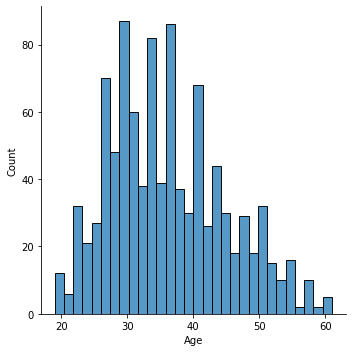

In [10]:
sns.displot(ad_data['Age'],kde=False,bins=30)

In [11]:
# Creating a jointplot showing Area Income versus Age

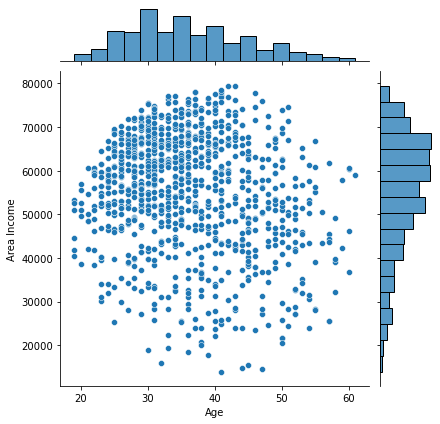

In [12]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

In [13]:
# Create a jointplot which showing the distribution of Daily Time Spent on Site versus Age

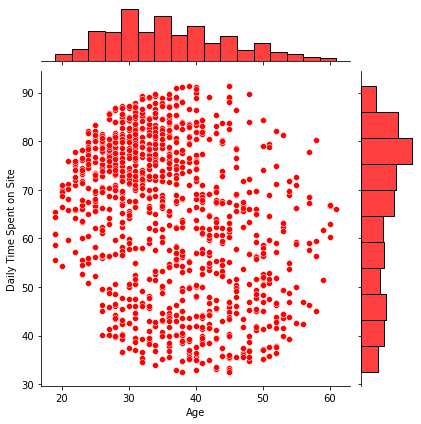

In [15]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='r')

In [16]:
# Creating a jointplot of Daily Time Spent on Site versus Daily Internet Usage

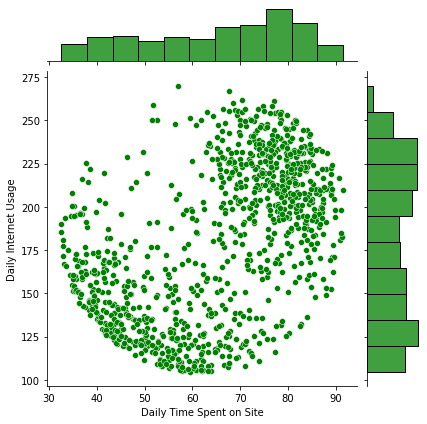

In [17]:
sns.jointplot(y='Daily Internet Usage',x='Daily Time Spent on Site',data=ad_data,color='g')

In [18]:
# creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.

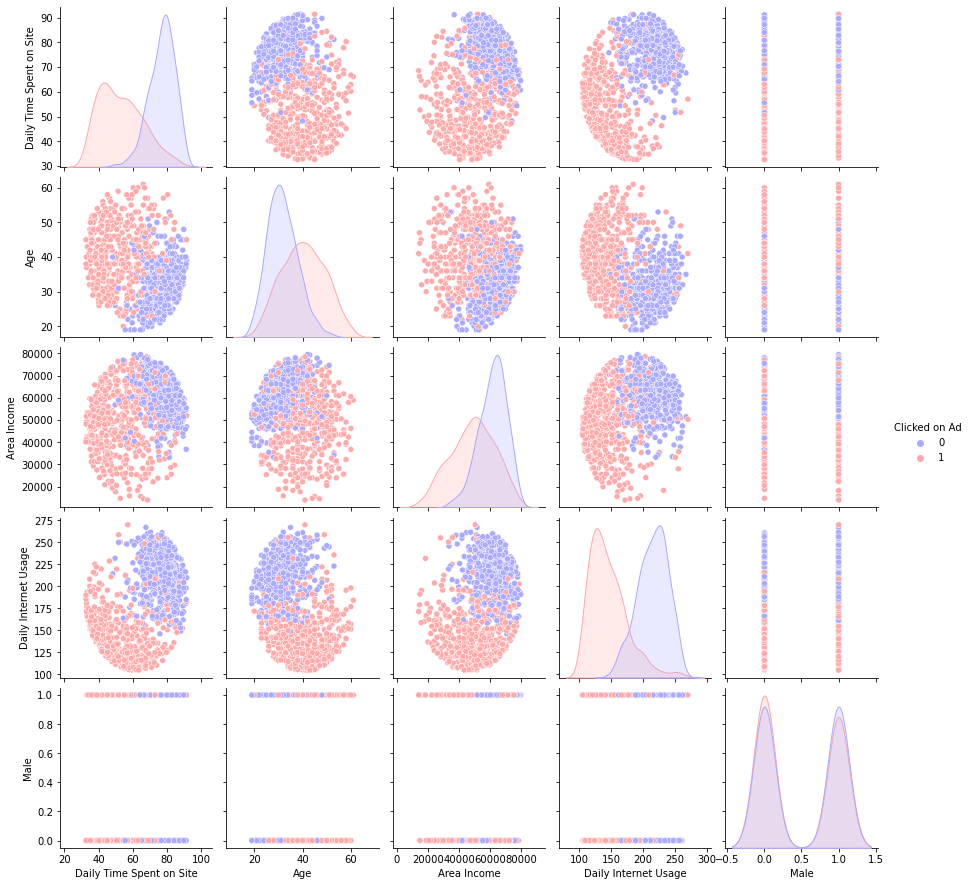

In [19]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

In [ ]:
# creating a pairplot with the hue defined by the 'Male' column feature.

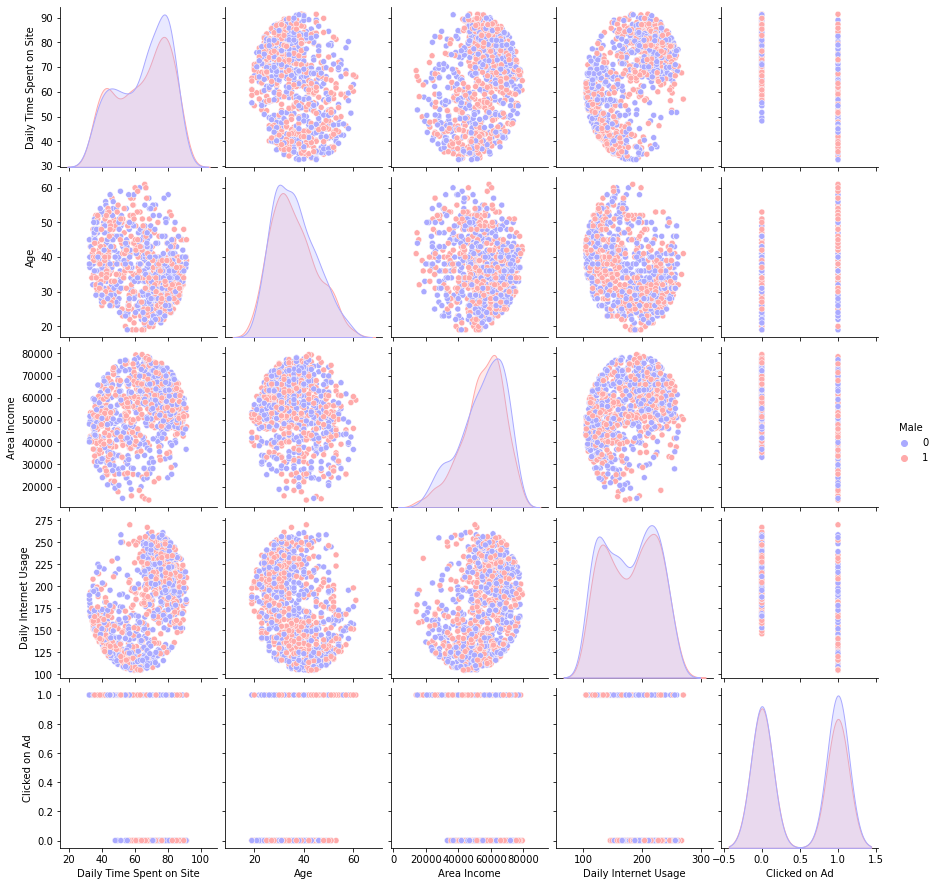

In [135]:
sns.pairplot(ad_data,hue='Male',palette='bwr')

#### Split the data into training set and testing set

In [20]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [29]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y=ad_data['Clicked on Ad']

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Training different classification algorithm on training dataset and select the most appropriate algorithm based on higher accuracy

###  1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression()

### Prediction and Evaluations

In [39]:
prediction_logmodel=logmodel.predict(X_test)

In [40]:
# creating a classification report and confusion matrix for the model

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,prediction_logmodel))
print('\n')
print(confusion_matrix(y_test,prediction_logmodel))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



[[149   8]
 [ 14 129]]


###  2. Support Vector Classifier

In [54]:
from sklearn.svm import SVC

In [55]:
svc_model = SVC()

In [56]:
svc_model.fit(X_train,y_train)

SVC()

### Prediction and Evaluations

In [57]:
prediction_svc=svc_model.predict(X_test)

In [58]:
# creating a classification report and confusion matrix for the model

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,prediction_svc))
print('\n')
print(confusion_matrix(y_test,prediction_svc))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       157
           1       0.79      0.59      0.68       143

    accuracy                           0.73       300
   macro avg       0.74      0.72      0.72       300
weighted avg       0.74      0.73      0.72       300



[[134  23]
 [ 58  85]]


###  3. Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree_model = DecisionTreeClassifier()

In [65]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluations

In [66]:
predictions_dtree = dtree_model.predict(X_test)

In [67]:
# creating a classification report and confusion matrix for the model

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions_dtree))
print('\n')
print(confusion_matrix(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       0.95      0.96      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[150   7]
 [  6 137]]


### 4. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc_model = RandomForestClassifier()

In [73]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

### Predictions and Evaluations

In [74]:
predictions_rfc = rfc_model.predict(X_test)

In [ ]:
# creating a classification report and confusion matrix for the model

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,predictions_rfc))
print('\n')
print(confusion_matrix(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       157
           1       0.96      0.94      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[152   5]
 [  8 135]]


### 5. K-Nearest Neighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_model = KNeighborsClassifier()

In [98]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### Predictions and Evaluations

In [99]:
predictions_knn = knn_model.predict(X_test)

In [100]:
# creating a classification report and confusion matrix for the model

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(y_test,predictions_knn))
print('\n')
print(confusion_matrix(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       157
           1       0.72      0.67      0.70       143

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



[[120  37]
 [ 47  96]]


### 6. Naive Bayes Classifier

### 6(a) GaussianNB

In [103]:
from sklearn.naive_bayes import GaussianNB

In [106]:
gaussnb_model = GaussianNB()

In [108]:
gaussnb_model.fit(X_train,y_train)

GaussianNB()

### Predictions and Evaluations

In [109]:
predictions_gaussnb = gaussnb_model.predict(X_test)

In [110]:
# creating a classification report and confusion matrix for the model

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test,predictions_gaussnb))
print('\n')
print(confusion_matrix(y_test,predictions_gaussnb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       157
           1       0.98      0.97      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



[[154   3]
 [  5 138]]


### 6(b) MultinomialNB

In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
multinb_model = MultinomialNB()

In [115]:
multinb_model.fit(X_train,y_train)

MultinomialNB()

### Predictions and Evaluations

In [118]:
predictions_multinb = multinb_model.predict(X_test)

In [119]:
# creating a classification report and confusion matrix for the model

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(y_test,predictions_multinb))
print('\n')
print(confusion_matrix(y_test,predictions_multinb))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       157
           1       0.90      0.78      0.83       143

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



[[144  13]
 [ 32 111]]


### 6(c). BernoulliNB

In [122]:
from sklearn.naive_bayes import BernoulliNB

In [123]:
bernoullinb_model = BernoulliNB()

In [126]:
bernoullinb_model.fit(X_test,y_test)

BernoulliNB()

### Predictions and Evaluations

In [127]:
predictions_bernnb = bernoullinb_model.predict(X_test)

In [128]:
# creating a classification report and confusion matrix for the model

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(classification_report(y_test,predictions_bernnb))
print('\n')
print(confusion_matrix(y_test,predictions_bernnb))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       157
           1       0.00      0.00      0.00       143

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300



[[157   0]
 [143   0]]


C:\Users\arjun\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjun\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjun\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### From above analysis with training of different classification machine learning algorithm,We can select the GaussianNB model on the basis of accuracy because its accuracy is more than any algorithm with 97%.